In [1]:
import pandas as pd
import itertools
from bokeh.plotting import figure, output_notebook, show
import datashader as ds
import datashader.transfer_functions as tf
from datashader.callbacks import InteractiveImage
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

c:\Users\Michael\Anaconda3\lib\site-packages\pandas\computation\__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)


In [2]:
# Load all the data. Takes a long time
YEARS = [1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013]
FILE_PATHS = ['./datasets/merged_1996_PP.csv', './datasets/merged_1997_PP.csv', './datasets/merged_1998_PP.csv',
         './datasets/merged_1999_PP.csv', './datasets/merged_2000_PP.csv', './datasets/merged_2001_PP.csv',
         './datasets/merged_2002_PP.csv', './datasets/merged_2003_PP.csv', './datasets/merged_2004_PP.csv', 
         './datasets/merged_2005_PP.csv', './datasets/merged_2006_PP.csv', './datasets/merged_2007_PP.csv', 
             './datasets/merged_2008_PP.csv', './datasets/merged_2009_PP.csv', './datasets/merged_2010_PP.csv', 
             './datasets/merged_2011_PP.csv', './datasets/merged_2012_PP.csv', './datasets/merged_2013_PP.csv', ]

combined_df = []

for index, path in enumerate(FILE_PATHS):
    df = pd.read_csv(path, encoding='latin-1', low_memory=False)
    df['year'] = list(itertools.repeat(YEARS[index],len(df)))
    combined_df.append(df)

combined_df = pd.concat(combined_df)

# Only use Primarily Bachelor Degree Granting Universities
# combined_df = combined_df[combined_df.PREDDEG == 3]

OSError: File b'./datasets/merged_1996_PP.csv' does not exist

In [30]:
# Clean up some stuff
COLUMN_NAME1 = 'GRAD_DEBT_MDN'
COLUMN_NAME2 = 'AVGFACSAL'

df = combined_df
# Remove Privacy Suppressed Columns and NA columns
df = df.dropna(subset = [COLUMN_NAME1, COLUMN_NAME2])
df = df[df[COLUMN_NAME1] != 'PrivacySuppressed']
df['GRAD_DEBT_MDN'] = df['GRAD_DEBT_MDN'].astype(float)
df['year'] = df['year'].astype('category')

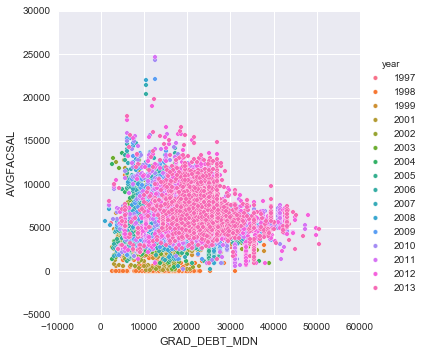

In [36]:
# Going to use datashader to try to make this look better
ax = sns.pairplot(data=df, hue = 'year', x_vars='GRAD_DEBT_MDN',y_vars='AVGFACSAL',size=5)
# ax.fig.get_axes()[0].set_yscale('log')
plt.show()

In [9]:
output_notebook()

# Define General Plot
def base_plot():
    p = figure(
        x_range=(-1000, 50000),
        y_range=(-1000, 40000),
        tools='pan,wheel_zoom,box_zoom,reset', 
        plot_width=800, 
        plot_height=500,
    )
    p.xgrid.grid_line_color = None
    p.ygrid.grid_line_color = None
    p.xaxis.axis_label = "Median Debt"
    p.yaxis.axis_label = "Average Faculty Salary"
    p.xaxis.axis_label_text_font_size = '12pt'
    p.yaxis.axis_label_text_font_size = '12pt'
    return p
    
options = dict(line_color=None, fill_color='blue', size=5)

Loading BokehJS ...

In [10]:
samples = df.sample(n=1000)
p = base_plot()
p.circle(x=samples['GRAD_DEBT_MDN'], y=samples['AVGFACSAL'], **options)
show(p)

In [11]:
options = dict(line_color='blue', fill_color='blue', size=1, alpha=0.05)
samples = df.sample(n=10000)
p = base_plot()
p.circle(x=samples['GRAD_DEBT_MDN'], y=samples['AVGFACSAL'], **options)
show(p)

In [13]:
# p = base_plot()
pipeline = ds.Pipeline(df, ds.Point('GRAD_DEBT_MDN', 'AVGFACSAL'))
InteractiveImage(p, pipeline)

In [38]:
color_key = {'1996':'blue', '1997':'green', '1998':'red', '1999':'orange',  '2000':'saddlebrown', '2001':'yellowgreen', '2002':'gold', '2003':'rosybrown', '2004':'goldenrod', '2005':'indianred', '2006':'burlywood', '2007':'chocolate', '2008':'salmon', '2009':'coral', '2010':'hotpink', '2011':'violetred', '2012':'orchid', '2013':'black'}

In [44]:
plot_width  = int(1000)
plot_height = int(plot_width*7.0/12)
def create_image(x_range, y_range, w=plot_width, h=plot_height):
    cvs = ds.Canvas(plot_width=w, plot_height=h, x_range=x_range, y_range=y_range)
    agg = cvs.points(df, 'GRAD_DEBT_MDN', 'AVGFACSAL', ds.count_cat('year'))
    img = tf.colorize(agg, color_key, how='eq_hist')
    return img

def export(img,filename,fmt=".png",_return=True):
    """Given a datashader Image object, saves it to a disk file in the requested format"""
    if black_background: 
        img=tf.set_background(img,"black")
    img.to_pil().save(filename+fmt)
    return img if _return else None

In [43]:
export(create_image((-10000,40000),(-1000,200000)),"Zoom 0 - USA")
# create_image((-10000,40000),(-1000,200000))

TypeError: unhashable type: 'list'

In [40]:
len(cats)

NameError: name 'cats' is not defined